In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.svm import SVC

In [3]:
from sklearn.datasets import load_iris

In [4]:
load_iris

<function sklearn.datasets.base.load_iris(return_X_y=False)>

In [5]:
iris = load_iris()

In [6]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
x = iris.data
y = iris.target

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
#選擇length
iris.feature_names[0:4:2]

['sepal length (cm)', 'petal length (cm)']

In [10]:
x1 = x[:,0:4:2] 

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x1_train , x1_test , y_train , y_test = train_test_split(x1 , y , test_size = 0.2 , random_state = 1)

In [13]:
clf1 = SVC(gamma = 'auto')

In [14]:
clf1.fit(x1_train , y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

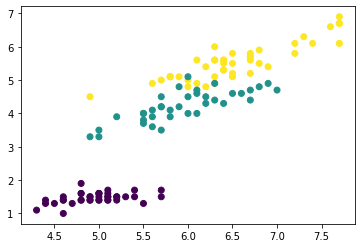

In [15]:
plt.scatter(x1_train[:,0] , x1_train[:,1] , c = y_train )

In [16]:
y1_pred = clf1.predict(x1_test)

In [17]:
y_test - y1_pred

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0])

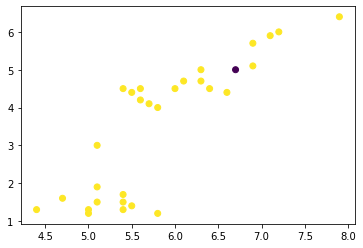

In [18]:
plt.scatter(x1_test[:,0] , x1_test[:,1] , c = y_test - y1_pred)
#預測錯誤的點：紫色

In [23]:
xx = np.linspace(4,8,40)
yy = np.linspace(1,8,40)

XX , YY = np.meshgrid(xx ,yy)

In [24]:
X = XX.ravel()
Y = YY.ravel()
XY = np.c_[X,Y]
pred = clf1.predict(XY)

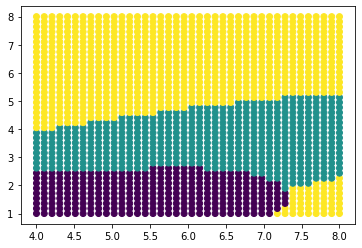

In [25]:
plt.scatter(X , Y , c = pred)

In [26]:
Z = pred.reshape(XX.shape)

In [27]:
XX.shape

(40, 40)

In [28]:
YY.shape

(40, 40)

In [29]:
Z.shape

(40, 40)

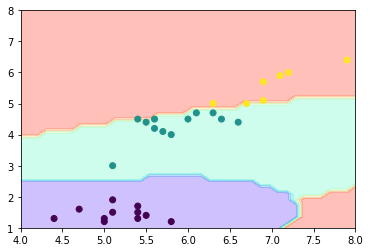

In [33]:
plt.contourf(XX , YY , Z , cmap = 'rainbow' , alpha = 0.3)
plt.scatter(x1_test[:,0] , x1_test[:,1] , c = y1_pred)

#分類錯誤的點：有點跑到綠色區域的黃色點，不過絕大部分都分對了！